<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/CROSS_SUBSTRATE_TRAINING_XGBOOST_WITH_TREESHAP_TRAIN_NEIL1_AND_AJUBA_PREDICT_TTYH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [2]:
%load_ext autoreload
%autoreload 2   

In [3]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap

import feature_subsets
import xgboost


In [4]:
## Load all the datasets : TTYH2
ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ttyh2_comp=ttyh2_comp[~ttyh2_comp["editing_value"].isnull().values]
ttyh2_comp=format_for_xgboost(ttyh2_comp)

(601, 205)


In [5]:
## Load all the datasets: NEIL1
neil1_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
neil1_comp=neil1_comp[~neil1_comp["editing_value"].isnull().values]
neil1_comp=format_for_xgboost(neil1_comp)

(432, 202)


In [6]:
## Load all the dtasets: AJUBA
ajuba_comp=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
ajuba_comp=ajuba_comp[~ajuba_comp["editing_value"].isnull().values]
ajuba_comp=format_for_xgboost(ajuba_comp)

(482, 195)


In [7]:
random.seed(1234)
np.random.seed(1234)
train_split,eval_split=split_train_eval_by_mut_pos(ttyh2_comp[~ttyh2_comp['mut_pos'].isna()])
null_mut_pos=train_split[train_split['mut_pos'].isna()]
train_split=pd.concat((train_split,null_mut_pos),axis=0)

{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


## Train TTYH2, predict NEIL1

In [8]:
test_split=neil1_comp

In [9]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [10]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [11]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [12]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u2_length_stem
d3_length_internal_es
u1_length_bulge
site_prev_struct:I
u2_3prm_cp_internal:C:G
u_hairpin_length
u3_length_stem
d3_3prm_cp_bulge
u1_5prm_cp_bulge
d1_length_internal_es
u2_3prm_cp_internal:U:A
u2_length_internal_es
u2_struct:S
u3_5prm_cp_bulge
u3_3prm_cp_internal:G:U
d1_5prm_cp_bulge
u1_exist
mut_next_struct:B
d3_length_internal_ecs
u1_3prm_cp_internal:C:G
u1_length_hairpin
u2_5prm_cp_internal:G:U
mut_ref_nt:A
u2_5prm_cp_internal:U:A
u1_distance
d3_5prm_cp_bulge
mut_type:wt
site_3prm_cp_bulge:G:U
site_next_struct:S
u2_3prm_cp_bulge:U:A
u1_3prm_cp_internal
u3_length_hairpin
site_length_stem
u3_length_internal_es
d1_length_hairpin
d1_5prm_cp_internal:C:G
site_5prm_cp_bulge:U:G
d3_length_bulge
site_next_struct:I
d3_struct:S
mut_next_struct:E
d3_struct:B
mut_type:indel
d1_exist
d1_3prm_cp_bulge
u3_length_bulge
mut_prev_struct:H
site_5prm_cp_internal:U:G
site_prev_struct:S
d1_distance
d3_exist
d1_length_internal_ecs
d1_3prm_cp_internal
d2_5prm_cp_hairpin
d2_5prm_cp_bulge:A:U


In [13]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [14]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [15]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 101)
(494,)
(83, 101)
(83,)
(432, 201)
(432,)


In [16]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [17]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['d3_length', 'site_next_nt:A', 'site_3prm_cp_internal:C:G', 'sim_nor_score', 'd2_3prm_cp_internal:G:C', 'u2_struct:B', 'd2_5prm_cp_internal:C:G', 'site_1_1:A:G', 'num_mutations', 'u2_5prm_cp_internal:C:G', 'mut_next_struct:I', 'minimum_free_energy', 'ensemble_free_energy', 'probability_active_conf', 'mut_ref_nt:C', 'site_1_1:A:U', 'u2_distance', 'ensemble_diversity', 'd2_5prm_cp_bulge:G:C', 'site_next_nt:C', 'mut_nt:A', 'site_5prm_cp_internal:G:C', 'site_1_1:A:C', 'd2_struct:I', 'mut_prev_struct:B', 'site_5prm_cp_internal:C:G', 'u3_struct:S', 'mut_prev_struct:I', 'd2_5prm_cp_bulge:G:U', 'mut_ref_nt:G', 'site_prev_nt:U', 'd2_5prm_cp_internal:G:C', 'site_struct:B', 'u2_3prm_cp_bulge:G:U', 'mut_prev_struct:S', 'd2_3prm_cp_internal:C:G', 'mut_struct:S', 'mut_nt:C', 'mfe_frequency', 'u_count', 'site_3prm_cp_bulge:G:C', 'u2_3prm_cp_internal:G:C', 'u2_length', 'u1_length', 'site_prev_nt:A', 'site_3prm_cp_internal:G:U', 'site_length_internal_ecs', 'd2_3prm_cp_bulge:C:G', 'd1_length', 'd2_3prm

In [18]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [19]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [20]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [26]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.29990	eval-auc:0.77917	eval-mae:0.27485	eval-map:1.00000	eval-rmse:0.29468	train-aucpr:0.31022	train-auc:0.71010	train-mae:0.24229	train-map:1.00000	train-rmse:0.26063
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.31772	eval-auc:0.79127	eval-mae:0.19857	eval-map:1.00000	eval-rmse:0.21672	train-aucpr:0.32817	train-auc:0.73441	train-mae:0.17231	train-map:1.00000	train-rmse:0.18856
[2]	eval-aucpr:0.32167	eval-auc:0.80385	eval-mae:0.14640	eval-map:1.00000	eval-rmse:0.16233	train-aucpr:0.33185	train-auc:0.74389	train-mae:0.12391	train-map:1.00000	train-rmse:0.13835
[3]	eval-aucpr:0.32701	eval-auc:0.81030	eval-mae:0.10804	eval-map:1.00000	eval-rmse:0.12105	train-aucpr:0.33504	train-auc:0.74915	train-mae:0.09083	train-map:1.00000	train-rmse:0.10359
[4]	eval-aucpr:0.32733	eval-auc:0.81058	eval-mae:0.08575	eval-map:1.00000	eval-rmse:0.09659	train-aucpr:0.33718	tra

[44]	eval-aucpr:0.33818	eval-auc:0.82737	eval-mae:0.02022	eval-map:1.00000	eval-rmse:0.03028	train-aucpr:0.35155	train-auc:0.76700	train-mae:0.00396	train-map:1.00000	train-rmse:0.00565
[45]	eval-aucpr:0.33824	eval-auc:0.82746	eval-mae:0.02013	eval-map:1.00000	eval-rmse:0.03024	train-aucpr:0.35157	train-auc:0.76701	train-mae:0.00380	train-map:1.00000	train-rmse:0.00541
[46]	eval-aucpr:0.33827	eval-auc:0.82757	eval-mae:0.02002	eval-map:1.00000	eval-rmse:0.03016	train-aucpr:0.35157	train-auc:0.76702	train-mae:0.00369	train-map:1.00000	train-rmse:0.00528
[47]	eval-aucpr:0.33824	eval-auc:0.82754	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03009	train-aucpr:0.35157	train-auc:0.76703	train-mae:0.00360	train-map:1.00000	train-rmse:0.00516
[48]	eval-aucpr:0.33825	eval-auc:0.82758	eval-mae:0.01994	eval-map:1.00000	eval-rmse:0.03003	train-aucpr:0.35159	train-auc:0.76705	train-mae:0.00347	train-map:1.00000	train-rmse:0.00500
[49]	eval-aucpr:0.33875	eval-auc:0.82773	eval-mae:0.01985	eval-map:1.0

[89]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01908	eval-map:1.00000	eval-rmse:0.02919	train-aucpr:0.35179	train-auc:0.76722	train-mae:0.00110	train-map:1.00000	train-rmse:0.00155
[90]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01907	eval-map:1.00000	eval-rmse:0.02919	train-aucpr:0.35179	train-auc:0.76722	train-mae:0.00108	train-map:1.00000	train-rmse:0.00153
[91]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01904	eval-map:1.00000	eval-rmse:0.02918	train-aucpr:0.35179	train-auc:0.76722	train-mae:0.00103	train-map:1.00000	train-rmse:0.00146
[92]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01904	eval-map:1.00000	eval-rmse:0.02918	train-aucpr:0.35179	train-auc:0.76722	train-mae:0.00103	train-map:1.00000	train-rmse:0.00146
[93]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01904	eval-map:1.00000	eval-rmse:0.02918	train-aucpr:0.35179	train-auc:0.76722	train-mae:0.00103	train-map:1.00000	train-rmse:0.00146
[94]	eval-aucpr:0.33929	eval-auc:0.82858	eval-mae:0.01904	eval-map:1.0

In [27]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [30]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.4)

Train
	Spearman corr : SpearmanrResult(correlation=0.9998001190012847, pvalue=0.0)
	Pearson corr : (0.9999367348028101, 0.0)
	MAE : 0.0010276252656159898
	MAPE : 0.012588832978723721
	RMSE : 0.0014589165035937177
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9559471880688312, pvalue=7.019836794828024e-45)
	Pearson corr : (0.9767293973154073, 6.279173520428695e-56)
	MAE : 0.01903949165059792
	MAPE : 0.3654126220859621
	RMSE : 0.029177559775440568
	auPRC : 1.0
	auROC : 1.0
Test
	Spearman corr : SpearmanrResult(correlation=0.29826332442526077, pvalue=2.517976372044977e-10)
	Pearson corr : (0.2441756366564452, 2.7712925431217843e-07)
	MAE : 0.21816888097259735
	MAPE : 1.239707541937118
	RMSE : 0.2877960825869408
	auPRC : 0.49430559256123185
	auROC : 0.6742969260954872


In [31]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998001190012847, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9559471880688312, pvalue=7.019836794828024e-45)
Test:SpearmanrResult(correlation=0.29826332442526077, pvalue=2.517976372044977e-10)


Pearson correlation:
Train:(0.9999367348028101, 0.0)
Eval:(0.9767293973154073, 6.279173520428695e-56)
Test:(0.2441756366564452, 2.7712925431217843e-07)


In [32]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010276252656159898
MAE Eval:0.01903949165059792
MAE Test:0.21816888097259735


In [33]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.258883297872372%
MAPE Eval:36.54126220859621%
MAPE Test:123.9707541937118%


In [34]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0014589165035937177
RMSE Eval:0.029177559775440568
RMSE Test:0.2877960825869408


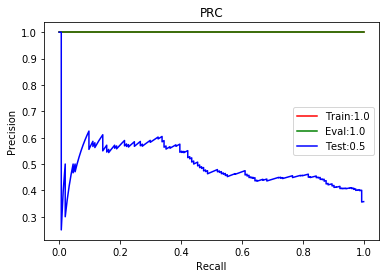

In [35]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.4,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

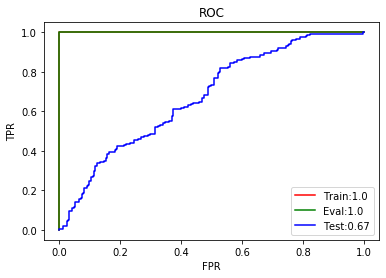

In [36]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.4,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [37]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.11366663
37.226839778143166
35.781084785832135
The R-square of the test data is  0.039 



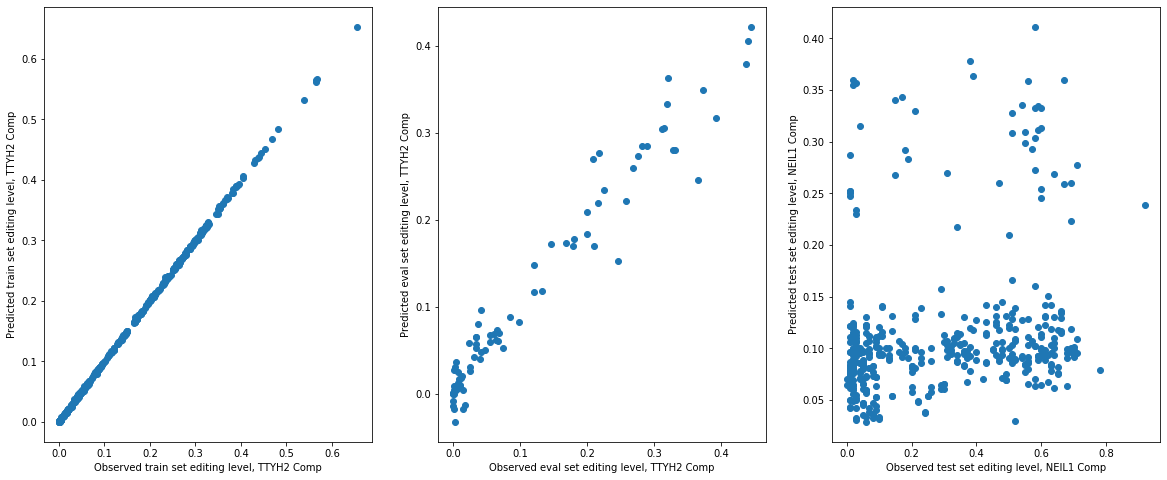

In [38]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, NEIL1 Comp")
plt.ylabel("Predicted test set editing level, NEIL1 Comp")

plt.show()

## Train TTYH2, predict AJUBA

In [39]:
test_split=ajuba_comp

In [40]:
train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [41]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [42]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [43]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

site_5prm_cp_hairpin
u2_length_stem
d3_length_internal_es
d1_5prm_cp_internal
u1_length_bulge
d3_3prm_cp_internal
u3_length_internal_es
d1_length_hairpin
d2_exist
u3_length_internal_ecs
site_length_bulge
u1_length_internal_ecs
d3_length_bulge
d3_3prm_cp_bulge
u1_length_internal_es
d1_length_internal_es
d2_length_bulge
d2_length_hairpin
d1_struct:S
u2_exist
d3_struct:S
u3_exist
d3_5prm_cp_internal
d1_5prm_cp_bulge
u1_exist
u2_5prm_cp_hairpin
d3_length_internal_ecs
u1_length_hairpin
d2_length_stem
d3_5prm_cp_bulge
d1_exist
u1_distance
site_length_hairpin
d1_length_bulge
d1_3prm_cp_bulge
u3_5prm_cp_hairpin
u3_length_bulge
u1_5prm_cp_hairpin
site_next_struct:S
u2_length_hairpin
d1_distance
d1_5prm_cp_hairpin
d3_exist
d1_length_internal_ecs
d1_3prm_cp_internal
d2_5prm_cp_hairpin
d3_length_hairpin
d3_5prm_cp_hairpin
u2_length_bulge
u3_length_hairpin
site_length_stem


In [44]:
#remove teh features that don't change across isoforms , or are null for all isoforms
for cur_to_drop in to_drop: 
    try:
        train_split=train_split.drop(cur_to_drop,axis=1)
    except: 
        pass
    try:
        eval_split=eval_split.drop(cur_to_drop,axis=1)
    except: 
        pass 
    try:
        test_split=test_split.drop(to_drop,axis=1)
    except: 
        pass

In [45]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [46]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

(494, 100)
(494,)
(83, 100)
(83,)
(482, 143)
(482,)


In [47]:
train_cols=set(train_X.columns)
eval_cols=set(eval_X.columns)
test_cols=set(test_X.columns)

In [48]:
common=train_cols.intersection(eval_cols)
common=list(common.intersection(test_cols))
print(common)
train_X=train_X[common]
eval_X=eval_X[common]
test_X=test_X[common]
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)

['d3_length', 'site_next_nt:A', 'site_prev_nt:G', 'sim_nor_score', 'd2_3prm_cp_internal:G:C', 'u2_struct:B', 'num_mutations', 'u2_5prm_cp_internal:C:G', 'mut_next_struct:I', 'minimum_free_energy', 'ensemble_free_energy', 'probability_active_conf', 'mut_ref_nt:C', 'site_1_1:A:U', 'u2_distance', 'ensemble_diversity', 'd2_5prm_cp_bulge:G:C', 'site_next_nt:C', 'mut_nt:A', 'site_5prm_cp_internal:G:C', 'site_1_1:A:C', 'd2_struct:I', 'mut_prev_struct:B', 'site_5prm_cp_internal:C:G', 'u3_struct:S', 'mut_prev_struct:I', 'd2_5prm_cp_bulge:G:U', 'mut_ref_nt:G', 'site_prev_nt:U', 'd2_5prm_cp_internal:G:C', 'site_struct:B', 'mut_prev_struct:S', 'd2_3prm_cp_internal:C:G', 'mut_struct:S', 'mut_nt:C', 'mfe_frequency', 'u_count', 'site_3prm_cp_bulge:G:C', 'u2_3prm_cp_internal:G:C', 'u2_length', 'u1_length', 'site_prev_nt:A', 'site_length_internal_ecs', 'd2_3prm_cp_bulge:C:G', 'd1_length', 'd2_3prm_cp_bulge:G:U', 'site_5prm_cp_bulge:C:G', 'd3_distance', 'd_count', 'site_3prm_cp_internal:G:C', 'mut_nt:G'

In [49]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [50]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['aucpr','auc','mae','map','rmse']

In [51]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [52]:
num_round = 1000
random.seed(1234)
np.random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-aucpr:0.29990	eval-auc:0.77917	eval-mae:0.27456	eval-map:1.00000	eval-rmse:0.29449	train-aucpr:0.31141	train-auc:0.70952	train-mae:0.24240	train-map:1.00000	train-rmse:0.26082
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-aucpr:0.31671	eval-auc:0.78810	eval-mae:0.19893	eval-map:1.00000	eval-rmse:0.21739	train-aucpr:0.32777	train-auc:0.73304	train-mae:0.17241	train-map:1.00000	train-rmse:0.18871
[2]	eval-aucpr:0.32363	eval-auc:0.80764	eval-mae:0.14219	eval-map:1.00000	eval-rmse:0.15801	train-aucpr:0.33166	train-auc:0.74476	train-mae:0.12389	train-map:1.00000	train-rmse:0.13827
[3]	eval-aucpr:0.32545	eval-auc:0.80767	eval-mae:0.10764	eval-map:1.00000	eval-rmse:0.11994	train-aucpr:0.33498	train-auc:0.74969	train-mae:0.09053	train-map:1.00000	train-rmse:0.10313
[4]	eval-aucpr:0.32727	eval-auc:0.81325	eval-mae:0.08204	eval-map:1.00000	eval-rmse:0.09003	train-aucpr:0.33758	tra

[44]	eval-aucpr:0.33735	eval-auc:0.82582	eval-mae:0.02159	eval-map:1.00000	eval-rmse:0.03388	train-aucpr:0.35154	train-auc:0.76696	train-mae:0.00426	train-map:1.00000	train-rmse:0.00600
[45]	eval-aucpr:0.33799	eval-auc:0.82614	eval-mae:0.02153	eval-map:1.00000	eval-rmse:0.03381	train-aucpr:0.35155	train-auc:0.76698	train-mae:0.00410	train-map:1.00000	train-rmse:0.00581
[46]	eval-aucpr:0.33799	eval-auc:0.82614	eval-mae:0.02149	eval-map:1.00000	eval-rmse:0.03377	train-aucpr:0.35157	train-auc:0.76701	train-mae:0.00393	train-map:1.00000	train-rmse:0.00559
[47]	eval-aucpr:0.33799	eval-auc:0.82615	eval-mae:0.02144	eval-map:1.00000	eval-rmse:0.03367	train-aucpr:0.35159	train-auc:0.76703	train-mae:0.00375	train-map:1.00000	train-rmse:0.00523
[48]	eval-aucpr:0.33803	eval-auc:0.82625	eval-mae:0.02135	eval-map:1.00000	eval-rmse:0.03358	train-aucpr:0.35160	train-auc:0.76704	train-mae:0.00366	train-map:1.00000	train-rmse:0.00512
[49]	eval-aucpr:0.33752	eval-auc:0.82624	eval-mae:0.02125	eval-map:1.0

[89]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03224	train-aucpr:0.35180	train-auc:0.76722	train-mae:0.00101	train-map:1.00000	train-rmse:0.00140
[90]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03224	train-aucpr:0.35180	train-auc:0.76722	train-mae:0.00101	train-map:1.00000	train-rmse:0.00140
[91]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03224	train-aucpr:0.35180	train-auc:0.76722	train-mae:0.00101	train-map:1.00000	train-rmse:0.00140
[92]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03224	train-aucpr:0.35180	train-auc:0.76722	train-mae:0.00101	train-map:1.00000	train-rmse:0.00140
[93]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.00000	eval-rmse:0.03224	train-aucpr:0.35180	train-auc:0.76722	train-mae:0.00101	train-map:1.00000	train-rmse:0.00140
[94]	eval-aucpr:0.33937	eval-auc:0.82759	eval-mae:0.01999	eval-map:1.0

In [53]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [54]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.07)

Train
	Spearman corr : SpearmanrResult(correlation=0.9998179371337643, pvalue=0.0)
	Pearson corr : (0.9999414404281008, 0.0)
	MAE : 0.0010052035814290205
	MAPE : 0.013388523792261227
	RMSE : 0.0014033318891498961
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9565664676087275, pvalue=4.0050464579216415e-45)
	Pearson corr : (0.9720814039932204, 9.15157568422741e-53)
	MAE : 0.019992217635299663
	MAPE : 0.3310184991378631
	RMSE : 0.032236393851203
	auPRC : 0.9975496865412832
	auROC : 0.9982142857142858
Test
	Spearman corr : SpearmanrResult(correlation=0.5371147800127924, pvalue=2.248736286657598e-37)
	Pearson corr : (0.4423406119974583, 1.6464630566653777e-24)
	MAE : 0.14841734282390748
	MAPE : 5.28379220497275
	RMSE : 0.168526722452666
	auPRC : 0.453603338015266
	auROC : 0.8271129541864138


In [55]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9998179371337643, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9565664676087275, pvalue=4.0050464579216415e-45)
Test:SpearmanrResult(correlation=0.5371147800127924, pvalue=2.248736286657598e-37)


Pearson correlation:
Train:(0.9999414404281008, 0.0)
Eval:(0.9720814039932204, 9.15157568422741e-53)
Test:(0.4423406119974583, 1.6464630566653777e-24)


In [56]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0010052035814290205
MAE Eval:0.019992217635299663
MAE Test:0.14841734282390748


In [57]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:1.3388523792261227%
MAPE Eval:33.10184991378631%
MAPE Test:528.379220497275%


In [58]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0014033318891498961
RMSE Eval:0.032236393851203
RMSE Test:0.168526722452666


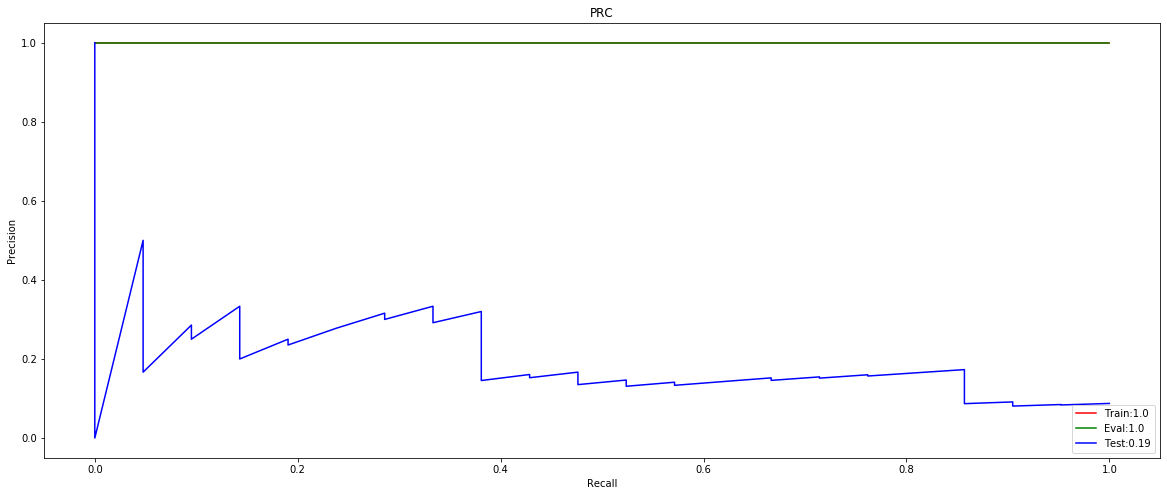

In [59]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.4,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.4,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

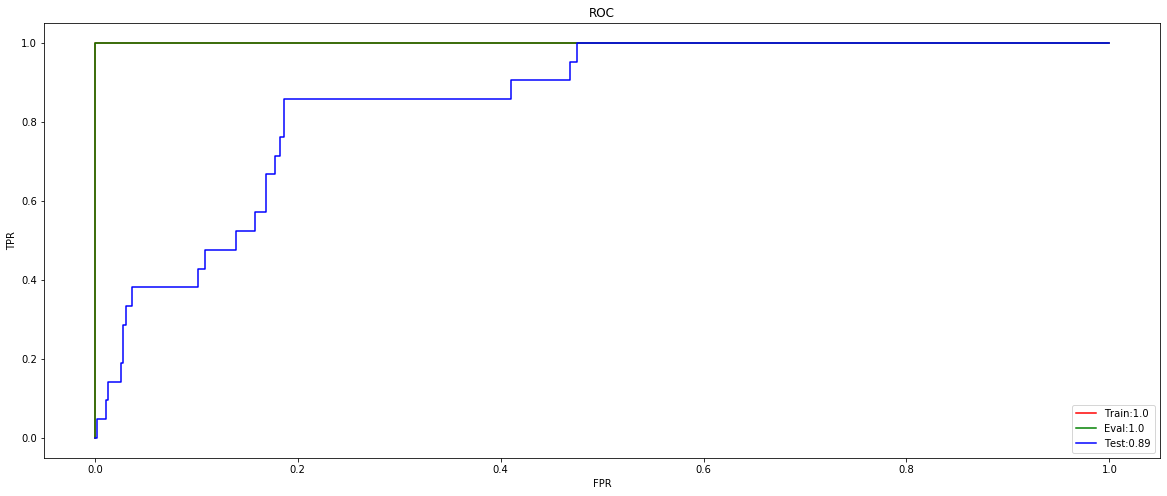

In [60]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.4,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.4,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.4,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.4,eval_pred)
auroc_test=roc_auc_score(test_y>=0.4,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [61]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.18520322
12.017714252918656
13.689405479067482
The R-square of the test data is  -0.139 



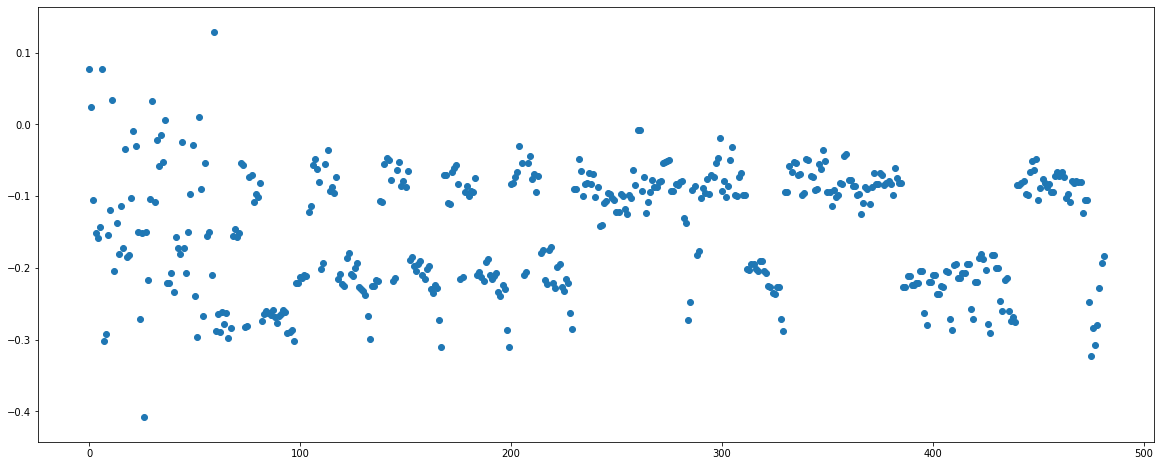

In [62]:
plt.scatter(list(range(len(residuals))),residuals)

In [ ]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, TTYH2 Comp")
plt.ylabel("Predicted train set editing level, TTYH2 Comp")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, TTYH2 Comp")
plt.ylabel("Predicted eval set editing level, TTYH2 Comp")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Comp")
plt.ylabel("Predicted test set editing level, AJUBA Comp")

plt.show()